In [387]:
import pandas as pd
%matplotlib inline

In [388]:
##################
# https://www.youtube.com/watch?v=5XGycFIe8qE
##################

In [389]:
data = pd.read_csv("data/coffees.csv")
data.head()
#type(data)

,timestamp,coffees,contributor
0,2011-10-03 08:22:00,397.0,Quentin
1,2011-10-04 11:48:00,410.0,Quentin
2,2011-10-05 07:02:00,testing,Anthony
3,2011-10-05 08:25:00,NaN,Quentin
4,2011-10-05 10:47:00,464.0,Quentin


In [390]:
# .loc or .iloc??
print(data.loc[2])
print(data.iloc[2])
print(data.iloc[:5])
print(data[:5])

timestamp      2011-10-05 07:02:00
coffees                    testing
contributor                Anthony
Name: 2, dtype: object
timestamp      2011-10-05 07:02:00
coffees                    testing
contributor                Anthony
Name: 2, dtype: object
             timestamp  coffees contributor
0  2011-10-03 08:22:00    397.0     Quentin
1  2011-10-04 11:48:00    410.0     Quentin
2  2011-10-05 07:02:00  testing     Anthony
3  2011-10-05 08:25:00      NaN     Quentin
4  2011-10-05 10:47:00    464.0     Quentin
             timestamp  coffees contributor
0  2011-10-03 08:22:00    397.0     Quentin
1  2011-10-04 11:48:00    410.0     Quentin
2  2011-10-05 07:02:00  testing     Anthony
3  2011-10-05 08:25:00      NaN     Quentin
4  2011-10-05 10:47:00    464.0     Quentin


In [391]:
# [] indexing on a series
data.coffees
data.coffees[:5]
print(type(data.coffees))
print(len(data))

<class 'pandas.core.series.Series'>
671


In [392]:
# .describe()
print(type(data.describe()))
data.describe()

<class 'pandas.core.frame.DataFrame'>


,timestamp,coffees,contributor
count,671,658,671
unique,671,654,9
top,2012-10-13 12:37:00,13523.0,Quentin
freq,1,2,367


In [393]:
# .isnull() and boolean indexing with []
data.isnull()
print(type(data.coffees.isnull()))
data[data.coffees.isnull()]

<class 'pandas.core.series.Series'>


,timestamp,coffees,contributor
3,2011-10-05 08:25:00,NaN,Quentin
15,2011-10-07 14:10:00,NaN,Ben
72,2011-10-28 10:53:00,NaN,Mike M
95,2011-11-11 11:13:00,NaN,Quentin
323,2012-06-10 16:10:00,NaN,Sergio
370,2012-07-13 13:59:00,NaN,Mike
394,2012-08-03 14:35:00,NaN,Sergio
479,2012-09-21 10:15:00,NaN,Sergio
562,2012-11-01 09:45:00,NaN,Quentin
606,2012-11-30 13:11:00,NaN,Quentin


In [394]:
# .dtypes, what type of python objects are the columns?
print(data.dtypes)
print(type(data))
type(data.dtypes)
data.dtypes
print(type(data.timestamp[0]),
      type(data.coffees[0]),
      type(data.contributor[0]),
      sep='\n')

timestamp      object
coffees        object
contributor    object
dtype: object
<class 'pandas.core.frame.DataFrame'>
<class 'str'>
<class 'str'>
<class 'str'>


In [395]:
# cast coffees column using pd.to_numeric, and coerce errors
data.coffees = pd.to_numeric(data.coffees, errors = "coerce")
data.head()

,timestamp,coffees,contributor
0,2011-10-03 08:22:00,397.0,Quentin
1,2011-10-04 11:48:00,410.0,Quentin
2,2011-10-05 07:02:00,NaN,Anthony
3,2011-10-05 08:25:00,NaN,Quentin
4,2011-10-05 10:47:00,464.0,Quentin


In [396]:
# coffees colum contains NaN
# .dropna() using a subset, and pass inplace
data.dropna()
data.dropna(inplace=True)
data = data.dropna() # same effect as above line
data.head()
data.index

Int64Index([  0,   1,   4,   5,   6,   7,   8,   9,  10,  11,
            ...
            661, 662, 663, 664, 665, 666, 667, 668, 669, 670],
           dtype='int64', length=657)

In [397]:
# .astype() cast float type to int
data.coffees = data.coffees.astype(int)
# .to_datetime() parse string to datetime object
data.timestamp = pd.to_datetime(data.timestamp)
print(data.dtypes)
data.head()
data.tail()

timestamp      datetime64[ns]
coffees                 int32
contributor            object
dtype: object


,timestamp,coffees,contributor
666,2013-03-12 08:28:00,18235,Sergio
667,2013-04-05 11:20:00,18942,Sergio
668,2013-04-27 11:04:00,19698,Sergio
669,2013-09-12 15:38:00,24450,Quentin
670,2013-09-13 10:28:00,24463,Quentin


In [398]:
data.describe() # find the first numeric column
# .describe(), passing the include kwarg to see all info
data.describe(include='all')

,timestamp,coffees,contributor
count,657,657.000000,657
unique,657,NaN,9
top,2011-10-24 14:32:00,NaN,Quentin
freq,1,NaN,361
first,2011-10-03 08:22:00,NaN,NaN
last,2013-09-13 10:28:00,NaN,NaN
mean,NaN,8568.471842,NaN
std,NaN,4600.215049,NaN
min,NaN,397.000000,NaN
25%,NaN,4986.000000,NaN


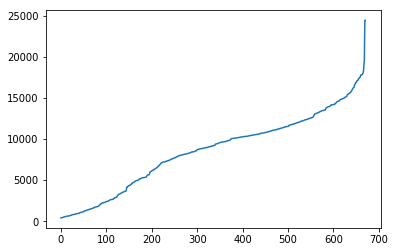

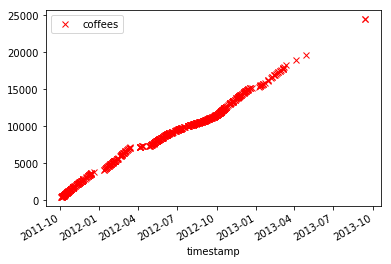

In [399]:
# .plot() on the coffee series
# pandas is plotting the coffees against the index, which is
# just a series of integers
data.coffees.plot()
# specify timestamp as x-axis
data.plot(x = 'timestamp', y = 'coffees', style='rx')

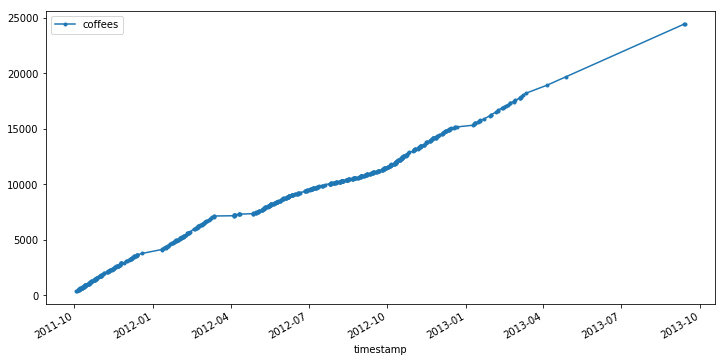

In [400]:
# cut off the tail of the time series
data[data.timestamp < '2013-03-01'].tail()
data.plot(x='timestamp', style='.-', figsize=(12, 6))

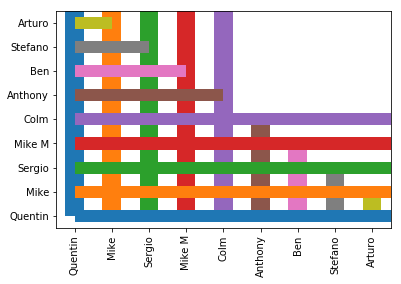

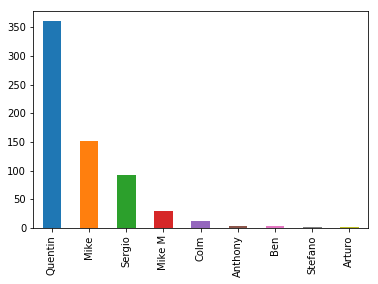

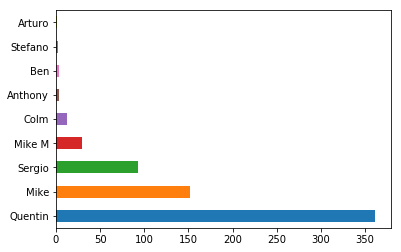

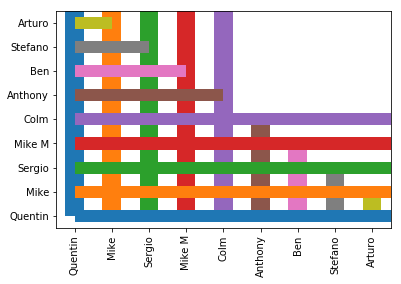

<Figure size 432x288 with 0 Axes>

In [401]:
# .value_counts()
data.contributor.value_counts() # series' index is name

# by default the two plots will be shown in one figure
data.contributor.value_counts().plot(kind='bar')
data.contributor.value_counts().plot(kind='barh')

# make two plots separate figures
import matplotlib.pyplot as plt
plt.figure()
data.contributor.value_counts().plot(kind='bar')
plt.figure()
data.contributor.value_counts().plot(kind='barh')
plt.show()

# set ax=.. to enface two plots in one figure
plt.figure()
ax_1 = data.contributor.value_counts().plot(kind='bar')
plt.figure()
data.contributor.value_counts().plot(kind='barh', ax=ax_1)
plt.show()

In [402]:
# on which weekdays were contributions made?
# .dt.weekday apply for each data.timestamp
weekdays = data.timestamp.dt.weekday

In [403]:
# .assign() it to the dataframe
data = data.assign(weekdays = weekdays)
data.head()

,timestamp,coffees,contributor,weekdays
0,2011-10-03 08:22:00,397,Quentin,0
1,2011-10-04 11:48:00,410,Quentin,1
4,2011-10-05 10:47:00,464,Quentin,2
5,2011-10-05 13:15:00,481,Quentin,2
6,2011-10-06 07:21:00,503,Anthony,3


In [404]:
# replace integers with actual weekdays
weekday_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekday_dict  = {key: weekday_names[key] for key in range(7)}

def day_of_week(idx):
    return weekday_dict[idx]

day_of_week(2)

'Wed'

In [405]:

# .apply() to apply a custom function to the weekdays column
data.weekdays.apply(day_of_week)
data.head()

# using lambda than explict function
data.weekdays = data.weekdays.apply(lambda x: weekday_dict[x])
data.head()

,timestamp,coffees,contributor,weekdays
0,2011-10-03 08:22:00,397,Quentin,Mon
1,2011-10-04 11:48:00,410,Quentin,Tue
4,2011-10-05 10:47:00,464,Quentin,Wed
5,2011-10-05 13:15:00,481,Quentin,Wed
6,2011-10-06 07:21:00,503,Anthony,Thu


          timestamp  coffees  contributor
weekdays                                 
Fri             117      117          117
Mon             148      148          148
Sat              30       30           30
Sun              13       13           13
Thu             118      118          118
Tue             100      100          100
Wed             131      131          131
          timestamp  coffees  contributor
weekdays                                 
Mon             148      148          148
Sat              30       30           30
Sun              13       13           13
Thu             118      118          118
Tue             100      100          100
timestamp      148
coffees        148
contributor    148
Name: Mon, dtype: int64
          timestamp  coffees  contributor
weekdays                                 
Mon             148      148          148
Tue             100      100          100
Wed             131      131          131
Thu             118      118         

<Figure size 432x288 with 0 Axes>

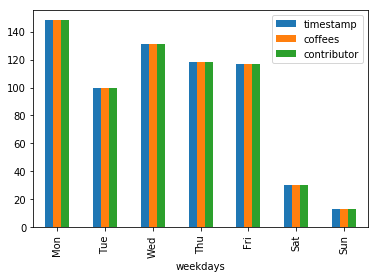

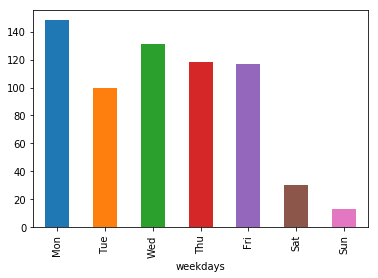

In [406]:
#.groupby() the weekdays and then .count() rows in each group
# DataFrameGroupBy object, .count() gives DataFrame
weekday_counts = data.groupby('weekdays').count()
# DataFrame with index as 'weekdays'
print(weekday_counts)

# access DataFrame by index range
print(weekday_counts['Mon':'Tue'])

# .loc[] to access DataFrame's specific entry by index
print(weekday_counts.loc['Mon'])
weekday_counts.loc['Mon', ['coffees', 'contributor']]
weekday_counts.loc[['Mon', 'Wed'], ['coffees', 'contributor']]

# .loc[] reorder DataFrame by weekday_names list
weekday_counts = weekday_counts.loc[weekday_names]
print(weekday_counts)
plt.figure()
weekday_counts.plot(kind='bar')
plt.figure()
weekday_counts.coffees.plot(kind='bar')
# this won't work!!
#weekday_counts[weekday_names]

In [407]:
data.index
# set timestamps to the dataframe's index
# set dataframe's .index property
data.index = data.timestamp
data.index

DatetimeIndex(['2011-10-03 08:22:00', '2011-10-04 11:48:00',
               '2011-10-05 10:47:00', '2011-10-05 13:15:00',
               '2011-10-06 07:21:00', '2011-10-06 10:04:00',
               '2011-10-06 12:14:00', '2011-10-06 12:49:00',
               '2011-10-06 14:52:00', '2011-10-07 07:34:00',
               ...
               '2013-03-04 11:12:00', '2013-03-04 16:43:00',
               '2013-03-05 10:42:00', '2013-03-05 13:29:00',
               '2013-03-08 10:28:00', '2013-03-12 08:28:00',
               '2013-04-05 11:20:00', '2013-04-27 11:04:00',
               '2013-09-12 15:38:00', '2013-09-13 10:28:00'],
              dtype='datetime64[ns]', name='timestamp', length=657, freq=None)

In [408]:
data.head()
# drop the timestamp column
# dataframe has to have an index, so assign index before drop
# axis=1 means drop the column, by default it's 0 meaning row
data.drop(['timestamp'], axis=1, inplace=True)
data.head()

,coffees,contributor,weekdays
timestamp,,,
2011-10-03 08:22:00,397,Quentin,Mon
2011-10-04 11:48:00,410,Quentin,Tue
2011-10-05 10:47:00,464,Quentin,Wed
2011-10-05 13:15:00,481,Quentin,Wed
2011-10-06 07:21:00,503,Anthony,Thu


In [409]:
# add some rows on every day to the dataframe
# pd.date_range, with daily frequency, and normalization
# help(pd.date_range) # return a fixed frequency DatatimeIndex
midnights = pd.date_range(data.index[0], data.index[-1], freq='D', normalize=True)
print(midnights)

DatetimeIndex(['2011-10-03', '2011-10-04', '2011-10-05', '2011-10-06',
               '2011-10-07', '2011-10-08', '2011-10-09', '2011-10-10',
               '2011-10-11', '2011-10-12',
               ...
               '2013-09-04', '2013-09-05', '2013-09-06', '2013-09-07',
               '2013-09-08', '2013-09-09', '2013-09-10', '2013-09-11',
               '2013-09-12', '2013-09-13'],
              dtype='datetime64[ns]', length=712, freq='D')


In [410]:
# .union take the union of existing and new index
#help(midnights.union)
new_index = midnights.union(data.index)

In [411]:
# .reindex() the dataframe
upsampled_data = data.reindex(new_index)
upsampled_data.head(10)
# .fillna()
upsampled_data.fillna(123).head(10)

,coffees,contributor,weekdays
2011-10-03 00:00:00,123.0,123,123
2011-10-03 08:22:00,397.0,Quentin,Mon
2011-10-04 00:00:00,123.0,123,123
2011-10-04 11:48:00,410.0,Quentin,Tue
2011-10-05 00:00:00,123.0,123,123
2011-10-05 10:47:00,464.0,Quentin,Wed
2011-10-05 13:15:00,481.0,Quentin,Wed
2011-10-06 00:00:00,123.0,123,123
2011-10-06 07:21:00,503.0,Anthony,Thu
2011-10-06 10:04:00,513.0,Quentin,Thu


In [412]:
# fill in NaN using interpolation
print(upsampled_data.interpolate(method='nearest').head(10))
upsampled_data = upsampled_data.interpolate(method='time')
upsampled_data.head(8)

                     coffees contributor weekdays
2011-10-03 00:00:00      NaN         NaN      NaN
2011-10-03 08:22:00    397.0     Quentin      Mon
2011-10-04 00:00:00    410.0         NaN      NaN
2011-10-04 11:48:00    410.0     Quentin      Tue
2011-10-05 00:00:00    464.0         NaN      NaN
2011-10-05 10:47:00    464.0     Quentin      Wed
2011-10-05 13:15:00    481.0     Quentin      Wed
2011-10-06 00:00:00    503.0         NaN      NaN
2011-10-06 07:21:00    503.0     Anthony      Thu
2011-10-06 10:04:00    513.0     Quentin      Thu


,coffees,contributor,weekdays
2011-10-03 00:00:00,NaN,NaN,NaN
2011-10-03 08:22:00,397.000000,Quentin,Mon
2011-10-04 00:00:00,404.408262,NaN,NaN
2011-10-04 11:48:00,410.000000,Quentin,Tue
2011-10-05 00:00:00,438.664249,NaN,NaN
2011-10-05 10:47:00,464.000000,Quentin,Wed
2011-10-05 13:15:00,481.000000,Quentin,Wed
2011-10-06 00:00:00,494.066298,NaN,NaN


In [413]:
# .resample() followed by .asfreq()
# .resample() is alike groupby
#help(upsampled_data.resample('D')) # like group by day
daily_data = upsampled_data.resample('D')
print(type(daily_data)) # pandas.core.resample.DatetimeIndexResampler

# .mean() gives mean value of each groups
daily_data.mean().head()
# .count() gives count of each groups
daily_data.count().head()

# DatetimeIndexResampler.asfreq() returns values at the new freq
# meaning the specific values at the exact freq location
print(daily_data.asfreq().head(10))
# only take the midnights data
daily_data = daily_data.asfreq()

<class 'pandas.core.resample.DatetimeIndexResampler'>
               coffees contributor weekdays
2011-10-03         NaN         NaN      NaN
2011-10-04  404.408262         NaN      NaN
2011-10-05  438.664249         NaN      NaN
2011-10-06  494.066298         NaN      NaN
2011-10-07  572.844311         NaN      NaN
2011-10-08  637.237253         NaN      NaN
2011-10-09  644.729448         NaN      NaN
2011-10-10  652.924658         NaN      NaN
2011-10-11  734.573206         NaN      NaN
2011-10-12  780.924214         NaN      NaN


In [414]:
# .drop() contributor column
type(daily_data.drop(['contributor'], axis=1, inplace=True))
daily_data.head(10)

,coffees,weekdays
2011-10-03,NaN,NaN
2011-10-04,404.408262,NaN
2011-10-05,438.664249,NaN
2011-10-06,494.066298,NaN
2011-10-07,572.844311,NaN
2011-10-08,637.237253,NaN
2011-10-09,644.729448,NaN
2011-10-10,652.924658,NaN
2011-10-11,734.573206,NaN
2011-10-12,780.924214,NaN


DatetimeIndex(['2011-10-03', '2011-10-04', '2011-10-05', '2011-10-06',
               '2011-10-07', '2011-10-08', '2011-10-09', '2011-10-10',
               '2011-10-11', '2011-10-12',
               ...
               '2013-09-04', '2013-09-05', '2013-09-06', '2013-09-07',
               '2013-09-08', '2013-09-09', '2013-09-10', '2013-09-11',
               '2013-09-12', '2013-09-13'],
              dtype='datetime64[ns]', length=712, freq='D')
Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       ...
       'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
      dtype='object', length=712)
               coffees weekdays
2011-10-03         NaN      NaN
2011-10-04  404.408262      NaN
2011-10-05  438.664249      NaN
2011-10-06  494.066298      NaN
2011-10-07  572.844311      NaN
               coffees   weekdays
2011-10-03         NaN   

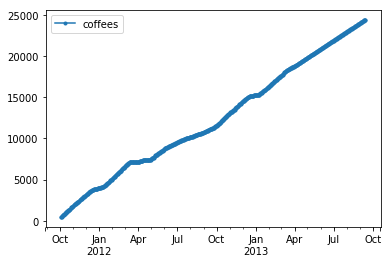

In [415]:
# generate a column of weekday names
print(daily_data.index)
print(daily_data.index.weekday_name)
print(daily_data.head())
daily_data['weekdays'] = daily_data.index.weekday_name
print(daily_data.head())
daily_data.plot(style='.-')
#daily_data['weekdays'] = daily_date.index

In [416]:
# .diff() on the coffees column, follow up with .shift()
print(daily_data.coffees.head())
coffees_made = daily_data.coffees.diff()
print(coffees_made.head())
coffees_made = daily_data.coffees.diff().shift(-1)
print(coffees_made.head())

# add as a new column
daily_data['coffee_made_today'] = coffees_made

2011-10-03           NaN
2011-10-04    404.408262
2011-10-05    438.664249
2011-10-06    494.066298
2011-10-07    572.844311
Freq: D, Name: coffees, dtype: float64
2011-10-03          NaN
2011-10-04          NaN
2011-10-05    34.255987
2011-10-06    55.402049
2011-10-07    78.778013
Freq: D, Name: coffees, dtype: float64
2011-10-03          NaN
2011-10-04    34.255987
2011-10-05    55.402049
2011-10-06    78.778013
2011-10-07    64.392941
Freq: D, Name: coffees, dtype: float64


['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
               coffees weekdays  coffee_made_today
2011-10-03         NaN      Mon                NaN
2011-10-04  404.408262      Tue          34.255987
2011-10-05  438.664249      Wed          55.402049
2011-10-06  494.066298      Thu          78.778013
2011-10-07  572.844311      Fri          64.392941


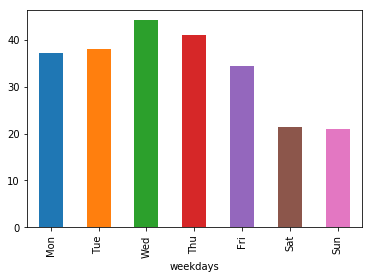

In [417]:
# .groupby 'weekdays', take the mean
print(daily_data.groupby('weekdays'))
print([wd[:3] for wd in weekday_names])
# trim the 'weekdays'
daily_data['weekdays'] = daily_data['weekdays'].apply(lambda x: x[:3])

coffees_by_day = daily_data.groupby('weekdays').mean()
print(daily_data.head())

coffees_by_day = coffees_by_day.loc[weekday_names]
coffees_by_day.coffee_made_today.plot(kind='bar')

In [421]:
# pull in data on how many people were in the department
# bring in data/department_members.csv
# have the first column be the index, and parse the dates
people = pd.read_csv('data/department_members.csv')
print(people.head())
print(daily_data.join(people, how='outer').head())

# use @date column as index
people = pd.read_csv('data/department_members.csv', index_col='date', parse_dates=True)
print(people.head())
print(daily_data.join(people, how='outer').head(10))


         date  members
0  2011-08-31       12
1  2011-09-30       14
2  2011-10-31       14
3  2011-11-30       14
4  2011-12-31       15
                        coffees weekdays  coffee_made_today date  members
2011-10-03 00:00:00         NaN      Mon                NaN  NaN      NaN
2011-10-04 00:00:00  404.408262      Tue          34.255987  NaN      NaN
2011-10-05 00:00:00  438.664249      Wed          55.402049  NaN      NaN
2011-10-06 00:00:00  494.066298      Thu          78.778013  NaN      NaN
2011-10-07 00:00:00  572.844311      Fri          64.392941  NaN      NaN
            members
date               
2011-08-31       12
2011-09-30       14
2011-10-31       14
2011-11-30       14
2011-12-31       15
               coffees weekdays  coffee_made_today  members
2011-08-31         NaN      NaN                NaN     12.0
2011-09-30         NaN      NaN                NaN     14.0
2011-10-03         NaN      Mon                NaN      NaN
2011-10-04  404.408262      Tue       